In [162]:
'''
仿造 sklearn.model_selection 的 train_test_split() 函數實作自己的 train_test_split() 函數
載入 boston 資料
載入 boston 資料，切分為訓練和測試資料
利用 LSTAT 來預測 MEDV，使用 sklearn 建立線性迴歸模型
畫出訓練資料散佈點與迴歸線
加入二次項與三次項建立迴歸模型，並將迴歸線加入圖中
利用測試資料計算三個模型的 R2R2 與 RMSE
練習將 https://storage.googleapis.com/py_ml_datasets/train.csv 中的 Sex 與 Embarked 由類別型變數轉換為 One-hot encoding 的 dummy variables
'''

from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## 1. 仿造 sklearn.model_selection 的 train_test_split() 函數實作自己的 train_test_split() 函數

In [121]:
def My_train_test_split(x,y,test_size,seed=''):
    li = range(len(x))
    if seed != '':
        random.seed(seed)
    else:
        random.seed()
    random.shuffle(li)
    rd_x = np.zeros(len(x))
    rd_y = np.zeros(len(y))
    n = 0
    for i in li:
        rd_x[n] = x[i]
        rd_y[n] = y[i]
        n +=1
        if n == len(x):
            break
    print rd_x
    f = int(test_size*10-1) #會有例外狀況
    x_test = rd_x[:f]
    x_train = rd_x[f:]
    y_test = rd_y[:f]
    y_train = rd_y[f:]
    return x_train,x_test,y_train,y_test

temperature = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30]).reshape(-1, 1) 
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84]).reshape(-1, 1)

print My_train_test_split(temperature,iced_tea_sales,0.4,4)

[ 32.  24.  33.  34.  25.  31.  29.  31.  30.  29.  26.  25.  28.  31.]
(array([ 34.,  25.,  31.,  29.,  31.,  30.,  29.,  26.,  25.,  28.,  31.]), array([ 32.,  24.,  33.]), array([ 93.,  51.,  73.,  64.,  75.,  84.,  77.,  65.,  59.,  62.,  84.]), array([ 80.,  58.,  91.]))


## 2. 載入 boston 資料

## 2-1. 載入 boston 資料，切分為訓練和測試資料

In [126]:
boston = load_boston()
#print boston.DESCR
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.3)

(354, 13)
(152, 13)
(354,)
(152,)


## 2-2. 利用 LSTAT 來預測 MEDV，使用 sklearn 建立線性迴歸模型

In [132]:
X_train, X_test, y_train, y_test = train_test_split(boston.data[:,12], boston.target, test_size = 0.3)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("theta_0:%.4f" % reg.intercept_) #theta0
print("theta_1:%.4f" % reg.coef_) #theta1

theta_0:34.5619
theta_1:-0.9343


## 2-3. 畫出訓練資料散佈點與迴歸線

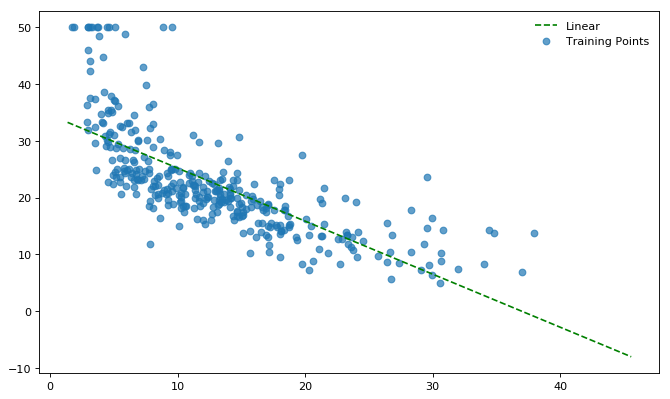

In [159]:
# plotting
X_fit = np.linspace(min(X_train) * 0.8, max(X_train) * 1.2, 50).reshape(-1, 1) #兩條線的X都是這個
y_lin_fit = reg.predict(X_fit)
plt.figure(figsize = (10,6),dpi = 80)
plt.scatter(X_train, y_train, alpha=.7, label = "Training Points")
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "g")
plt.legend(loc = "upper right", frameon = False)
plt.show()

## 2-4. 加入二次項與三次項建立迴歸模型，並將迴歸線加入圖中

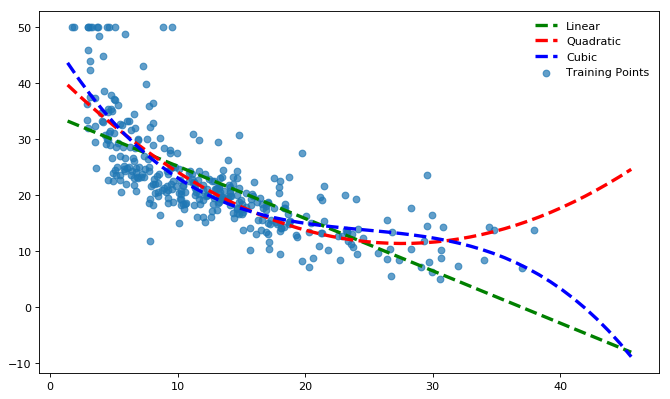

In [160]:
pr_q = linear_model.LinearRegression() 
cb_q = linear_model.LinearRegression() 

# create quadratic terms 初始化
quadratic = PolynomialFeatures(degree = 2)
X_train_quad = quadratic.fit_transform(X_train)
#print X_train_quad

# fit quadratic model
pr_q.fit(X_train_quad, y_train)
y_quad_fit = pr_q.predict(quadratic.fit_transform(X_fit))

# create Cubic equation
cubic = PolynomialFeatures(degree = 3)
X_train_cubic = cubic.fit_transform(X_train)
#print X_train_cubic

# fit quadratic model
cb_q.fit(X_train_cubic, y_train)
y_cubic_fit = cb_q.predict(cubic.fit_transform(X_fit))

# plotting
X_fit = np.linspace(min(X_train) * 0.8, max(X_train) * 1.2, 50).reshape(-1, 1) 
y_lin_fit = reg.predict(X_fit)
plt.figure(figsize = (10,6),dpi = 80)
plt.scatter(X_train, y_train, alpha=.7, label = "Training Points")
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "g",linewidth = 3)
plt.plot(X_fit, y_quad_fit, label = "Quadratic", linestyle = "--", c = "r",linewidth = 3)
plt.plot(X_fit, y_cubic_fit, label = "Cubic", linestyle = "--", c = "b",linewidth = 3)
plt.legend(loc = "upper right", frameon = False)
plt.show()

## 2-5. 利用測試資料計算三個模型的 Ｒ-squared與 RMSE

In [164]:
y_linear_hat = reg.predict(X_test)
y_quad_hat = pr_q.predict(quadratic.fit_transform(X_test))
y_cubic_hat = cb_q.predict(cubic.fit_transform(X_test))

rmse_linear = np.sqrt(mean_squared_error(y_test, y_linear_hat))
rmse_quad = np.sqrt(mean_squared_error(y_test, y_quad_hat))
rmse_cubic = np.sqrt(mean_squared_error(y_test, y_cubic_hat))

print("Linear R^2: %.4f" % r2_score(y_test, y_linear_hat))
print("Quadratic R^2: %.4f" % r2_score(y_test, y_quad_hat))
print("Cubic R^2: %.4f" % r2_score(y_test, y_cubic_hat))
print '\n'
print("Linear RMSE: %.4f" % rmse_linear)
print("Quadratic RMSE: %.4f" % rmse_quad)
print("Cubic RMSE: %.4f" % rmse_cubic)

Linear R^2: 0.5511
Quadratic R^2: 0.6525
Cubic R^2: 0.6682


Linear RMSE: 6.0790
Quadratic RMSE: 5.3487
Cubic RMSE: 5.2264


## 3. 練習將 https://storage.googleapis.com/py_ml_datasets/train.csv 中的 Sex 與 Embarked 由類別型變數轉換為 One-hot encoding 的 dummy variables

In [165]:
url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
df = pd.read_csv(url)
df.head() #preview

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
Sex_label = pd.get_dummies(df["Sex"])
Embarked_label = pd.get_dummies(df["Embarked"])
print Sex_label.head()
print Embarked_label.head()


   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1
   C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1
